In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

import pickle
import numpy as np
from RetaredHarmonicDynamics import animate_particle
from matplotlib import animation
from scipy.stats import moment
from scipy.special import factorial, lambertw, erf
from pathlib import Path

tensor = torch.tensor

from my_functions import get_pos, get_mean_std, FokkerPlankCalculator, time_delayed_harmonic, damped_harmonic_oszillator
from my_functions import get_approx_freq,get_zero, get_pos_with_border, get_pos_mirror

pic_path = Path('Graphic_Results/')

save_run = False

In [3]:
# Escape_rate_mirrored_min_min and EscapeRate_mirroed musst run first

In [4]:
#%store -r crossings_min_bound
#%store -r crossings_zero_bound

with open('nummeric_results/crossings_min_bound.pkl', 'rb') as f:
    crossings_min_bound = pickle.load(f)
with open('nummeric_results/crossings_zero_bound.pkl', 'rb') as f:
    crossings_zero_bound = pickle.load(f)

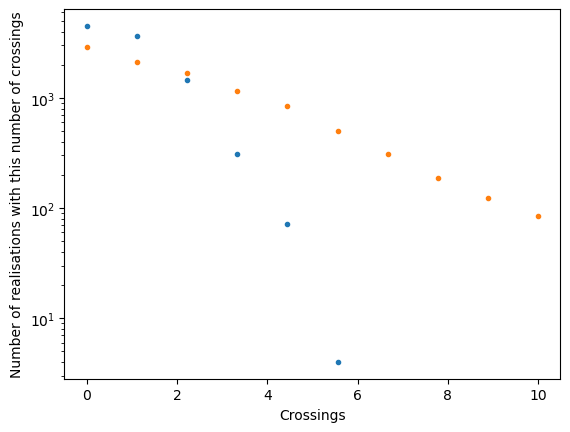

In [5]:
xlim  = (0,10)
plt.plot(np.linspace(*xlim,xlim[1]),crossings_min_bound[0][:xlim[1]],'.')
plt.plot(np.linspace(*xlim,xlim[1]),crossings_zero_bound[0][:xlim[1]],'.')
plt.xlabel('Crossings')
plt.ylabel('Number of realisations with this number of crossings')
plt.yscale('log')

In [6]:
#%store -r sime_res_bound_zero
#%store -r sime_res_bound_min
#%store -r sim_res_abs

with open('nummeric_results/sime_res_bound_zero.pkl', 'rb') as f:
    sime_res_bound_zero = pickle.load(f)
with open('nummeric_results/sime_res_bound_min.pkl', 'rb') as f:
    sime_res_bound_min = pickle.load(f)
with open('nummeric_results/sim_res_abs.pkl', 'rb') as f:
    sim_res_abs = pickle.load(f)

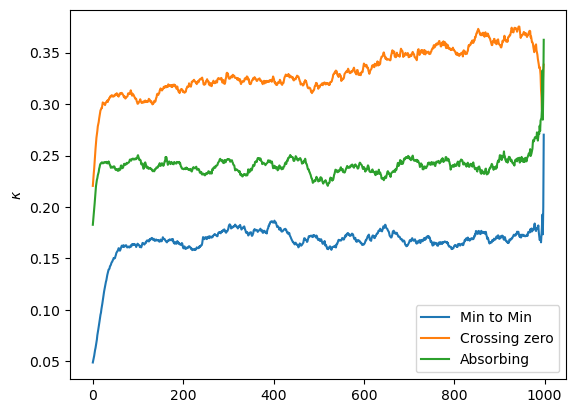

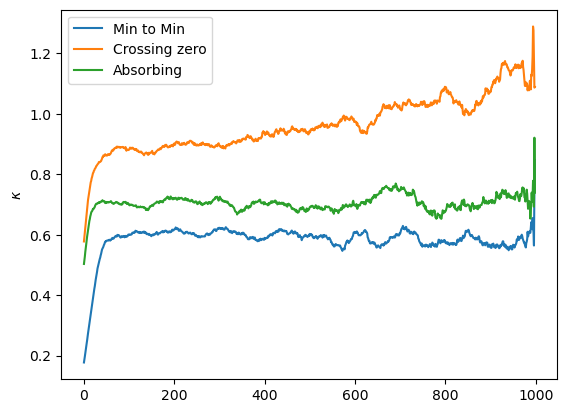

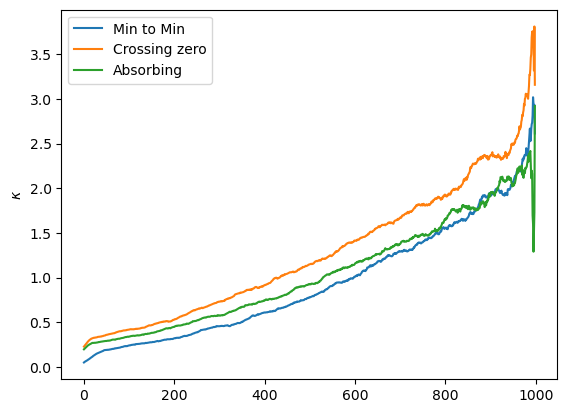

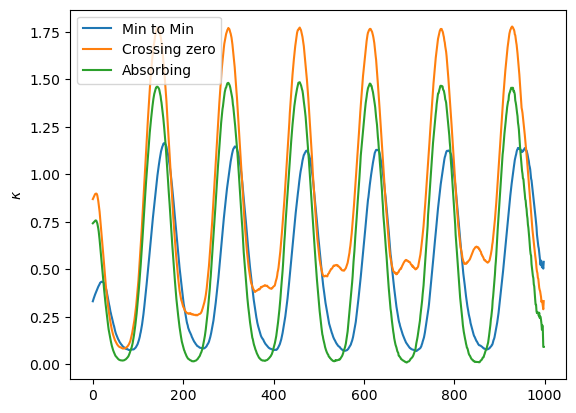

In [7]:
for sm, sz,sa in zip(sime_res_bound_min.values(), sime_res_bound_zero.values(), sim_res_abs.values()):
    plt.figure()
    if False:
        plt.plot(sm/max(*sm), label='Min to Min')
        plt.plot(sz/max(*sz), label='Crossing zero')
        plt.plot(sa/max(*sa), label='Absorbing')
    else:
        plt.plot(sm, label='Min to Min')
        plt.plot(sz, label='Crossing zero')
        plt.plot(sa, label='Absorbing')
    plt.legend()
    # plt.yscale('log')
    plt.ylabel('$\kappa$')

In [8]:
border = 0.8e-3
max_t = 8
dt = 4e-3

num = 10000
tau = 0
k = 15

torch.manual_seed(0)
pos_normal = get_pos(num_particle=num, k = k, tau=tau, dt = dt, max_t=max_t)
torch.manual_seed(0)
pos_abs = get_pos_with_border(border=border,num_particle=num, k = k, tau=tau, dt = dt, max_t=max_t)
torch.manual_seed(0)
pos_mirror = get_pos_mirror(x_m=border,num_particle=num, k = k, tau=tau, dt = dt, max_t=max_t)

In [9]:
pos_normal.shape, pos_abs.shape, pos_mirror.shape

(torch.Size([2000, 10000, 1]),
 torch.Size([2000, 10000, 1]),
 torch.Size([2000, 10000, 1]))

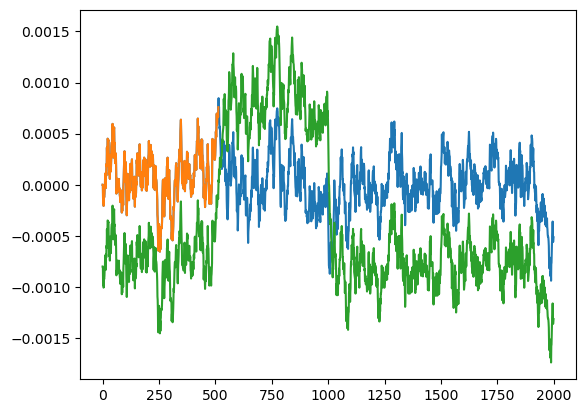

In [10]:
plt.plot(pos_normal[:,0])
plt.plot(pos_abs[:,0])
plt.plot(pos_mirror[:,0])

In [11]:
particles_abs = (~pos_abs.isnan()).sum(1)
particles_mirror = (pos_mirror < 0).sum(1)

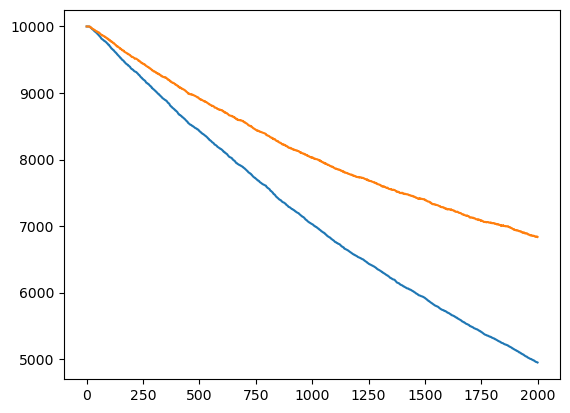

In [12]:
plt.plot(particles_abs)
plt.plot(particles_mirror)

In [13]:
crossings_raw = ((pos_mirror[1:]*pos_mirror[:-1]).sign() + pos_mirror[:-1].sign() == -2).sum(axis=1)+0.
diff_raw = particles_abs.diff(dim=0)*1.

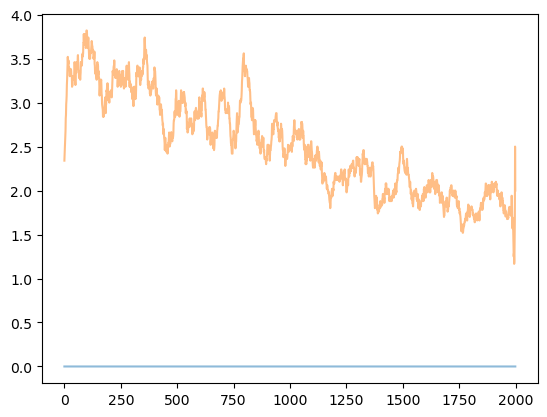

In [14]:
mean_bin = 50

crossings_raw = crossings_raw.squeeze()
crossing_mean = torch.stack([crossings_raw.repeat(mean_bin,1).diag(i).mean() for i in range(len(crossings_raw))])

diff_raw = diff_raw.squeeze()
diff_mean = torch.stack([diff_raw.repeat(mean_bin,1).diag(i).mean() for i in range(len(diff_raw))])

plt.plot(crossing_mean, alpha = 0.5)
plt.plot(-diff_mean, alpha = 0.5)

In [15]:
tensor([[1,2,3],[2,3,4]]).diag(3)

tensor([], dtype=torch.int64)

In [16]:
diff_mean.unsqueeze(1)

tensor([[-2.3400],
        [-2.4200],
        [-2.4800],
        ...,
        [-1.6667],
        [-2.5000],
        [-2.0000]])